In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# Dimensions
n, m = 4, 6
eta = 0.01           # learning rate for B
eta_lambda = 0.1     # learning rate for lambda
P_total = 10
max_iters = 100
tol = 1e-6



In [117]:

# --- Random initialization ---
np.random.seed(0)

H = np.random.randn(n, m)
x = np.random.uniform(-1, 1, size=(m, 1))  # Uniform distribution between -1 and 1
z = np.random.randn(n, 1)
a = np.ones((m, 1))  # All ones



In [118]:
 # Constant
aTx = float(a.T @ x)
lambda_reg = 1.0  # initialize Lagrange multiplier
B = np.random.randn(n, m)

for iter in range(max_iters):
    BH = B * H
    y = BH @ x + z - aTx

    # Gradient of Lagrangian w.r.t. B
    grad = 2 * (y @ x.T) * H + 2 * lambda_reg * B

    # Update B
    B_new = B - eta * grad

    # Frobenius norm squared of B_new
    frob_sq = np.sum(B_new ** 2)

    # Update lambda using projected gradient ascent (KKT-style)
    lambda_reg += eta_lambda * 2*(frob_sq )
    lambda_reg = max(0, lambda_reg)

    # Check convergence
    if np.linalg.norm(B_new - B, ord='fro') < tol:
        print(f"Converged at iteration {iter}")
        break

    B = B_new

# Final values
print("Optimized B:")
print(B)
print("Final lambda:", lambda_reg)


Optimized B:
[[ 0.00357995 -0.00126736  0.02179716 -0.01219996 -0.00968862  0.00528881]
 [ 0.00333983  0.00083036 -0.00398188 -0.00387213 -0.00129443 -0.01363267]
 [-0.00295474  0.00073726 -0.01891168  0.00347542  0.0148289  -0.00212411]
 [-0.00230998 -0.00983517  0.20672252  0.01293799  0.01630519 -0.0146031 ]]
Final lambda: 14.80803171197907


In [119]:
# Function to compute MMSE for one round
def compute_mmse(B, H, x, a, snr_db):
    n = B.shape[0]
    BH = B * H
    signal = BH @ x
    P_signal = np.sum(x**2) / n
    snr_linear = 10 ** (snr_db / 10)
    P_noise = P_signal / snr_linear
    z = np.random.normal(0, np.sqrt(P_noise), size=(n, 1))
    y = signal + z
    target = a.T @ x
    mmse = np.sum((y - target) ** 2) / n
    return mmse

# MMSE for SNR = 0 to 15 dB over 100 rounds
snrs = np.arange(0, 50)
mmse_vals = []
for snr_db in snrs:
    mmse_list = [compute_mmse(B, H, x, a, snr_db) for _ in range(500)]
    mmse_vals.append(np.mean(mmse_list))


print("mse",mmse_vals)

mse [0.423513885400941, 0.3838719925215897, 0.33865576486163207, 0.30507175717336665, 0.27172409209806103, 0.2569580649646066, 0.23337623244196373, 0.23019955216654056, 0.21639400361476951, 0.2094493490142247, 0.20194359728647415, 0.1899538174551331, 0.18525513148946327, 0.18331986949703624, 0.17761242828260168, 0.17931781523694315, 0.17395859623726279, 0.17513223343836096, 0.17426193674586166, 0.17286028793245814, 0.17241316990624186, 0.1724360672386133, 0.17184955078485625, 0.17055722195938314, 0.16998370578806377, 0.17028177509775735, 0.17109271556954064, 0.17006544432833695, 0.1703315301878326, 0.16973818777554156, 0.16971005477038073, 0.1692950496548858, 0.16961447992280984, 0.16976547857263674, 0.1696090574030413, 0.16968777687185435, 0.1695764383664093, 0.16964018391670196, 0.16952353312680307, 0.16966335334559463, 0.1695923320989991, 0.16955048564120584, 0.1696536443493471, 0.16977725065841742, 0.16961613398060507, 0.16955303866327176, 0.16961643218564856, 0.1695902404314496, 0

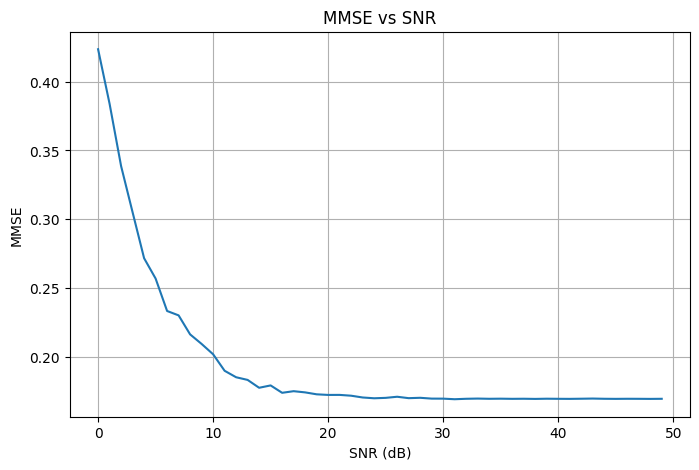

In [120]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(snrs, mmse_vals)
plt.xlabel('SNR (dB)')
plt.ylabel('MMSE')
plt.title('MMSE vs SNR')
plt.grid(True)
plt.show()